<a href="https://colab.research.google.com/github/ppeinadox/prediccion_nasdaq/blob/main/TFM_Patricia_Peinado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Preprocesamiento de los datos**



In [1]:
from google.colab import files
import pandas as pd

uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
print(df.head())

Saving Datos históricos del Nasdaq 100.csv to Datos históricos del Nasdaq 100.csv
        Fecha     Último   Apertura     Máximo     Mínimo     Vol.  % var.
0  27.02.2025  20.550,95  21.281,36  21.322,39  20.541,56  436,74M  -2,75%
1  26.02.2025  21.132,92  21.170,51  21.350,52  21.012,62  346,42M   0,22%
2  25.02.2025  21.087,24  21.318,77  21.326,81  20.930,58  409,08M  -1,24%
3  24.02.2025  21.352,08  21.669,36  21.727,58  21.341,96  395,00M  -1,21%
4  21.02.2025  21.614,08  22.110,54  22.115,21  21.597,16  396,39M  -2,06%


In [2]:
df = df.drop(columns=["% var."])

In [3]:
df["Fecha"] = pd.to_datetime(df["Fecha"], format="%d.%m.%Y")

print(df.dtypes)


Fecha       datetime64[ns]
Último              object
Apertura            object
Máximo              object
Mínimo              object
Vol.                object
dtype: object


In [4]:
df["Vol."] = df["Vol."].astype(str)
df["Vol."] = df["Vol."].str.replace(",", ".", regex=False)
df["Vol."] = df["Vol."].str.replace("M", "*1e6", regex=False)
df["Vol."] = df["Vol."].str.replace("B", "*1e9", regex=False)
df["Vol."] = df["Vol."].map(pd.eval)

print(df[["Vol."]].head())
print(df.dtypes)


          Vol.
0  436740000.0
1  346420000.0
2  409080000.0
3  395000000.0
4  396390000.0
Fecha       datetime64[ns]
Último              object
Apertura            object
Máximo              object
Mínimo              object
Vol.               float64
dtype: object


In [5]:
columnas_numericas = ["Último", "Apertura", "Máximo", "Mínimo"]
for col in columnas_numericas:
    df[col] = df[col].astype(str)
    df[col] = df[col].str.replace(".", "", regex=False)
    df[col] = df[col].str.replace(",", ".", regex=False)

df[columnas_numericas] = df[columnas_numericas].astype(float)

print(df.dtypes)


Fecha       datetime64[ns]
Último             float64
Apertura           float64
Máximo             float64
Mínimo             float64
Vol.               float64
dtype: object


In [6]:
print(df.isnull().sum())

Fecha       0
Último      0
Apertura    0
Máximo      0
Mínimo      0
Vol.        0
dtype: int64


In [7]:
df = df.sort_values(by="Fecha")
print(df.tail())

       Fecha    Último  Apertura    Máximo    Mínimo         Vol.
4 2025-02-21  21614.08  22110.54  22115.21  21597.16  396390000.0
3 2025-02-24  21352.08  21669.36  21727.58  21341.96  395000000.0
2 2025-02-25  21087.24  21318.77  21326.81  20930.58  409080000.0
1 2025-02-26  21132.92  21170.51  21350.52  21012.62  346420000.0
0 2025-02-27  20550.95  21281.36  21322.39  20541.56  436740000.0


In [8]:
df.to_csv("nasdaq100_limpio.csv", index=False, encoding="utf-8")

**Análisis exploratorio de datos(EDA)**

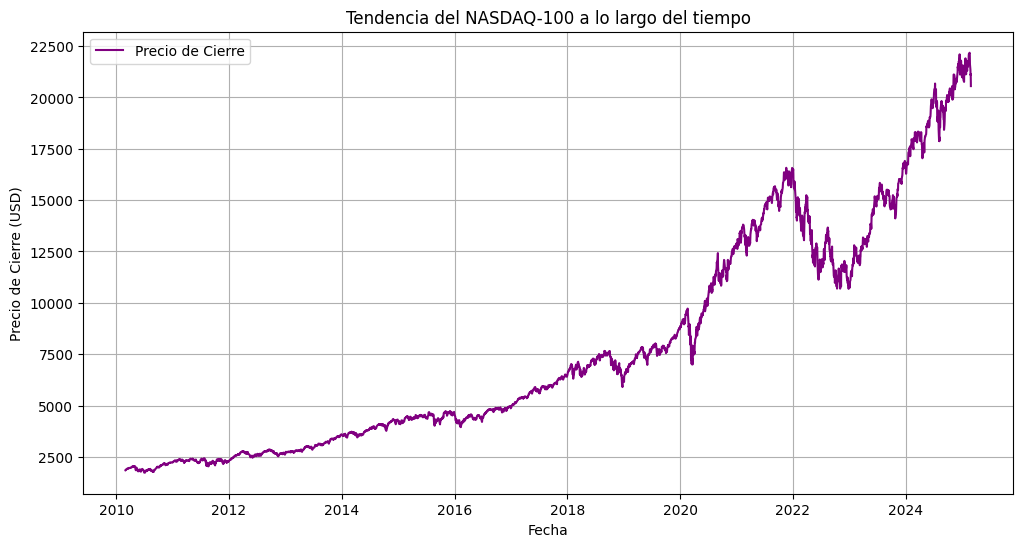

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['Fecha'], df['Último'], label='Precio de Cierre', color='purple')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.title('Tendencia del NASDAQ-100 a lo largo del tiempo')
plt.legend()
plt.grid(True)
plt.show()


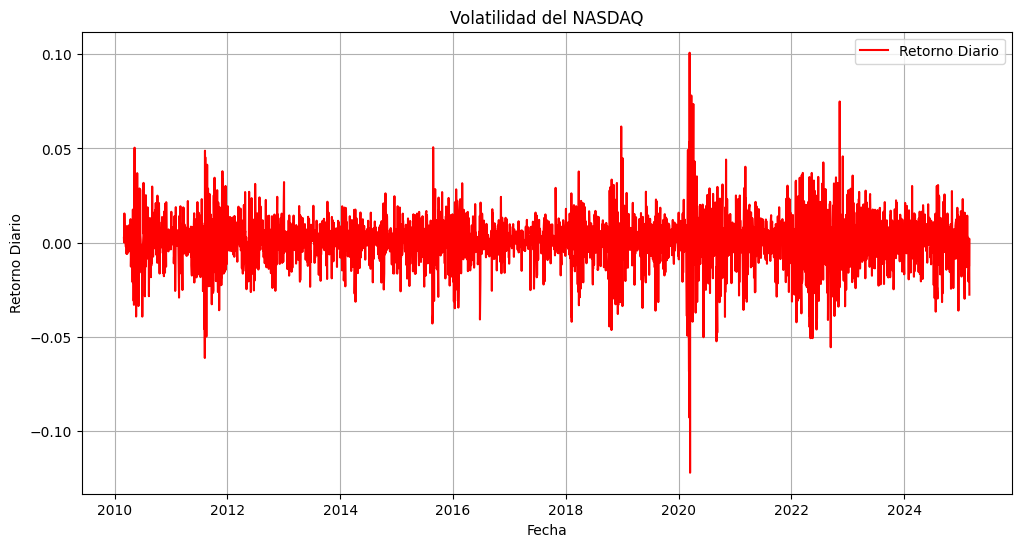

In [ ]:
df2 = df
df2['Daily Return'] = df2['Último'].pct_change()

plt.figure(figsize=(12,6))
plt.plot(df2['Fecha'], df2['Daily Return'], label='Retorno Diario', color='red')
plt.xlabel('Fecha')
plt.ylabel('Retorno Diario')
plt.title('Volatilidad del NASDAQ')
plt.legend()
plt.grid(True)
plt.show()

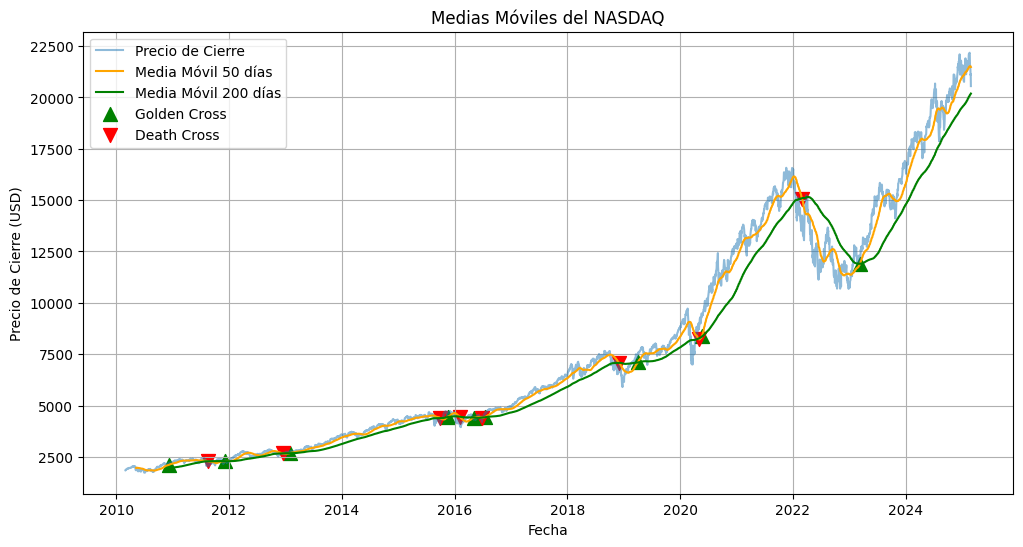

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

df['MA50'] = df['Último'].rolling(window=50).mean()
df['MA200'] = df['Último'].rolling(window=200).mean()

df['Crossover'] = np.where(df['MA50'] > df['MA200'], 1, 0)  # 1 cuando MA50 está arriba, 0 cuando está abajo
df['Crossover_Signal'] = df['Crossover'].diff()  # Detectar cambios

buy_signals = df[df['Crossover_Signal'] == 1]  # Cruce alcista
sell_signals = df[df['Crossover_Signal'] == -1]  # Cruce bajista

plt.figure(figsize=(12,6))
plt.plot(df['Fecha'], df['Último'], label='Precio de Cierre', alpha=0.5)
plt.plot(df['Fecha'], df['MA50'], label='Media Móvil 50 días', color='orange')
plt.plot(df['Fecha'], df['MA200'], label='Media Móvil 200 días', color='green')

plt.scatter(buy_signals['Fecha'], buy_signals['MA50'], marker='^', color='green', label="Golden Cross", s=100)
plt.scatter(sell_signals['Fecha'], sell_signals['MA50'], marker='v', color='red', label="Death Cross", s=100)

plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.title('Medias Móviles del NASDAQ')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
df = df.drop(columns=["Daily Return"])
df = df.drop(columns=["MA50"])
df = df.drop(columns=["MA200"])
df = df.drop(columns=["Crossover"])
df = df.drop(columns=["Crossover_Signal"])

In [ ]:
df.head()

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.
3773,2010-03-01,1846.40,1826.62,1848.10,1826.61,239660000.0
3772,2010-03-02,1851.21,1851.79,1862.64,1847.03,287160000.0
3771,2010-03-03,1851.57,1854.71,1861.15,1846.22,218110000.0
3770,2010-03-04,1859.72,1852.70,1860.76,1844.92,219370000.0
3769,2010-03-05,1888.56,1871.62,1889.68,1869.10,222740000.0


**Preparación de los datos**

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_scaled = df.copy()

df_scaled[['Último', 'Apertura', 'Máximo', 'Mínimo', 'Vol.']] = scaler.fit_transform(
    df[['Último', 'Apertura', 'Máximo', 'Mínimo', 'Vol.']]
)

print(df_scaled.head())

          Fecha    Último  Apertura    Máximo    Mínimo      Vol.
3773 2010-03-01  0.005774  0.004421  0.005163  0.006221  0.163161
3772 2010-03-02  0.006009  0.005653  0.005873  0.007225  0.204126
3771 2010-03-03  0.006027  0.005796  0.005800  0.007185  0.144576
3770 2010-03-04  0.006425  0.005697  0.005781  0.007121  0.145662
3769 2010-03-05  0.007836  0.006623  0.007193  0.008309  0.148569


In [10]:
import numpy as np

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 30  # Se consideran 30 días en cada secuencia
features = df_scaled[['Último', 'Apertura', 'Máximo', 'Mínimo', 'Vol.']].values
X, y = create_sequences(features, seq_length)
print(f"Número total de registros en df_scaled: {df_scaled.shape[0]}")
print(f"Total de secuencias creadas: {X.shape[0]}")

Número total de registros en df_scaled: 3774
Total de secuencias creadas: 3744


In [11]:
print(f"Forma de X: {X.shape}")
print(f"Forma de y: {y.shape}")

print("Primera secuencia de X:")
print(X[0])

print("Primer valor de y:")
print(y[0])  # día 21


Forma de X: (3744, 30, 5)
Forma de y: (3744,)
Primera secuencia de X:
[[0.00577388 0.00442128 0.00516302 0.00622097 0.16316094]
 [0.00600912 0.00565271 0.00587298 0.00722462 0.20412581]
 [0.00602672 0.00579557 0.00580022 0.00718481 0.14457582]
 [0.00642531 0.00569723 0.00578118 0.00712091 0.14566247]
 [0.00783577 0.00662288 0.00719327 0.00830937 0.14856882]
 [0.00794972 0.00742621 0.00744083 0.0092216  0.13483049]
 [0.00846275 0.00732592 0.00825283 0.00913952 0.18509224]
 [0.00924378 0.00807201 0.00870595 0.00988267 0.17000854]
 [0.00955972 0.00855294 0.00885976 0.01024049 0.13959104]
 [0.00959004 0.00947907 0.0091703  0.01063467 0.12917303]
 [0.00937778 0.00889883 0.00889296 0.01012351 0.1202125 ]
 [0.009972   0.00919874 0.00935535 0.01076099 0.16081516]
 [0.01016664 0.00970657 0.00993836 0.01134736 0.1384699 ]
 [0.0105442  0.00985237 0.00990808 0.01150759 0.13898735]
 [0.00998129 0.01016206 0.01009656 0.01104311 0.34272507]
 [0.01082052 0.00912339 0.01045495 0.01089517 0.14555898]
 [

In [12]:
from sklearn.model_selection import train_test_split

# Train (85%) y Test (15%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)

# dividimos el Train en Train (70%) y Validation (15%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1765, shuffle=False)

print(f"Tamaño del set de entrenamiento: {X_train.shape[0]}")
print(f"Tamaño del set de validación: {X_val.shape[0]}")
print(f"Tamaño del set de prueba: {X_test.shape[0]}")


Tamaño del set de entrenamiento: 2620
Tamaño del set de validación: 562
Tamaño del set de prueba: 562


In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def evaluar_modelo(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}")
    return mse, rmse, mae


In [14]:
import matplotlib.pyplot as plt

def plot_loss(history_dict, model_name):
    plt.figure(figsize=(8, 5))
    plt.plot(history_dict['loss'], label='Loss (Entrenamiento)')
    plt.plot(history_dict['val_loss'], label='Loss (Validación)')
    plt.xlabel('Épocas')
    plt.ylabel('Loss (MSE)')
    plt.title(f'Pérdida del Modelo {model_name}')
    plt.legend()
    plt.show()

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)


In [30]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 6.2 MB/s eta 0:00:00


Modelo LSTM

In [ ]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_model(hp):
    batch_size = hp.Choice('batch_size', values=[32, 64, 128])
    model_lstm = Sequential([
        LSTM(hp.Int('lstm_units', min_value=50, max_value=150, step=50), return_sequences=True, input_shape=(20, 5)),
        Dropout(hp.Choice('dropout_rate', values=[0.2, 0.3, 0.4])),
        LSTM(hp.Int('lstm_units', min_value=50, max_value=150, step=50), return_sequences=False),
        Dropout(hp.Choice('dropout_rate', values=[0.2, 0.3, 0.4])),
        Dense(hp.Int('dense_units', min_value=25, max_value=100, step=25), activation='tanh'),
        Dense(1)
    ])

    optimizer = Adam(learning_rate=hp.Choice('learning_rate', values=[0.0001, 0.0005, 0.001]))
    model_lstm.compile(optimizer=optimizer, loss='mse')

    return model_lstm

tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=20,
    executions_per_trial=1,
    directory='lstm_tuner',
    project_name='lstm_optimization_v3'
)

tuner.search(X_train, y_train,
             validation_data=(X_val, y_val),
             epochs=100,
             callbacks=[early_stopping])

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f" Mejores Hiperparámetros encontrados:")
print(f"- LSTM Units: {best_hps.get('lstm_units')}")
print(f"- Dropout Rate: {best_hps.get('dropout_rate')}")
print(f"- Dense Units: {best_hps.get('dense_units')}")
print(f"- Learning Rate: {best_hps.get('learning_rate')}")
print(f"- Batch Size: {best_hps.get('batch_size')}")

best_model = tuner.hypermodel.build(best_hps)
best_batch_size = best_hps.get('batch_size')
history_lstm = best_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=best_batch_size,
    callbacks=[early_stopping]
)

best_model.summary()

y_pred_lstm = best_model.predict(X_test)
evaluar_modelo(y_test, y_pred_lstm)



Reloading Tuner from lstm_tuner/lstm_optimization_v3/tuner0.json
 Mejores Hiperparámetros encontrados:
- LSTM Units: 100
- Dropout Rate: 0.2
- Dense Units: 50
- Learning Rate: 0.001
- Batch Size: 64
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0047 - val_loss: 0.0035
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.5195e-04 - val_loss: 5.3970e-04
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.0118e-04 - val_loss: 6.7898e-04
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.8619e-04 - val_loss: 3.8751e-04
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.4444e-04 - val_loss: 5.4743e-04
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.5330e-04 - val_loss: 5.1689e-04
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.4453e-04 - val_loss: 4.2278e-04
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.2245e-04 - val_loss: 7.3609e-04
Epoch 9/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.1477e-04 - val_loss: 4.8694e-04
Epoch 10/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.2269e-04 - val_loss: 3.7197e-04
Epoch 11/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.1145e-04 - val_l

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 20, 100)             │          42,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 20, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 383,705 (1.46 MB)

 Trainable params: 127,901 (499.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 255,804 (999.24 KB)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
MSE: 0.0006, RMSE: 0.0236, MAE: 0.0194


(0.0005557107330419938, 0.02357351762130535, 0.01941025346910204)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

best_model.save('/content/drive/MyDrive/mejor_modelo_lstm.h5', include_optimizer=True)
import json

with open('/content/drive/MyDrive/history_lstm.json', 'w') as f:
    json.dump(history_lstm.history, f)


Mounted at /content/drive


In [21]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import json
from tensorflow.keras.models import load_model
best_model = load_model('/content/drive/MyDrive/mejor_modelo_lstm.h5', compile=False)
best_model.compile(optimizer='adam', loss='mse')

with open('/content/drive/MyDrive/history_lstm.json', 'r') as f:
    history_lstm = json.load(f)

best_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 20, 100)             │          42,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 20, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 127,901 (499.61 KB)

 Trainable params: 127,901 (499.61 KB)

 Non-trainable params: 0 (0.00 B)

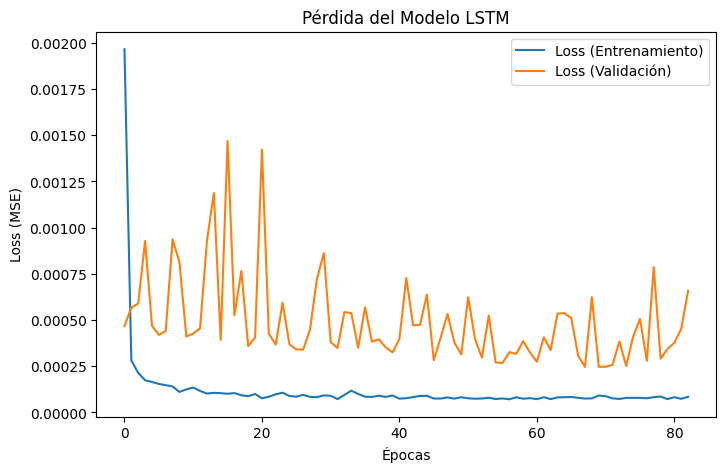

In [ ]:
plot_loss(history_lstm, "LSTM")

In [ ]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

class HyperGRUModel(kt.HyperModel):
    def build(self, hp):
        model_gru = Sequential([
            Input(shape=(20, 5)),
            GRU(hp.Int('gru_units', min_value=32, max_value=128, step=16), return_sequences=True),
            Dropout(hp.Choice('dropout_rate', [0.2, 0.3, 0.4])),
            GRU(hp.Int('gru_units', min_value=32, max_value=128, step=16), return_sequences=False),
            Dropout(hp.Choice('dropout_rate', [0.2, 0.3, 0.4])),
            Dense(hp.Int('dense_units', min_value=25, max_value=100, step=25), activation='tanh'),
            Dense(1)
        ])

        optimizer = Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.0005, 0.0001]))
        model_gru.compile(optimizer=optimizer, loss='mse')

        return model_gru

tuner = kt.RandomSearch(
    HyperGRUModel(),
    objective='val_loss',
    max_trials=20,
    executions_per_trial=1,
    directory='gru_tuner_v2',
    project_name='gru_optimization'
)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

tuner.search(X_train, y_train,
             validation_data=(X_val, y_val),
             epochs=100,
             callbacks=[early_stopping])

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_batch_size = best_hps.get('batch_size') if 'batch_size' in best_hps.values else 64

print(f"🏆 Mejores Hiperparámetros encontrados:")
print(f"- GRU Units: {best_hps.get('gru_units')}")
print(f"- Dropout Rate: {best_hps.get('dropout_rate')}")
print(f"- Dense Units: {best_hps.get('dense_units')}")
print(f"- Learning Rate: {best_hps.get('learning_rate')}")
print(f"- Batch Size: {best_batch_size}")

best_model = tuner.hypermodel.build(best_hps)
history_gru = best_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=best_batch_size,
    callbacks=[early_stopping]
)

best_model.save('mejor_modelo_gruv2.h5', include_optimizer=True)

best_model.summary()
y_pred_gru = best_model.predict(X_test)
evaluar_modelo(y_test, y_pred_gru)

Trial 20 Complete [00h 00m 20s]
val_loss: 0.00024002284044399858

Best val_loss So Far: 0.00016837911971379071
Total elapsed time: 00h 09m 14s
🏆 Mejores Hiperparámetros encontrados:
- GRU Units: 128
- Dropout Rate: 0.3
- Dense Units: 25
- Learning Rate: 0.0005
- Batch Size: 64
Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0064 - val_loss: 2.8106e-04
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.5266e-04 - val_loss: 4.5684e-04
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.2795e-04 - val_loss: 3.3143e-04
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.0466e-04 - val_loss: 2.4851e-04
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.8405e-04 - val_loss: 4.1314e-04
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.5531e-04 - val_loss: 2.4872e-04
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.6000e-04 - val_loss: 2.5055e-04
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.0839e-04 - va

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                          │ (None, 20, 128)             │          51,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 20, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 128)                 │          99,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           3,225 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 462,491 (1.76 MB)

 Trainable params: 154,163 (602.20 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 308,328 (1.18 MB)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
MSE: 0.0003, RMSE: 0.0172, MAE: 0.0140


(0.0002949885156550097, 0.017175229711855665, 0.013964866333081706)

In [ ]:
drive.mount('/content/drive')

best_model.save('/content/drive/MyDrive/mejor_modelo_gru.h5', include_optimizer=True)
import json

with open('/content/drive/MyDrive/history_gru.json', 'w') as f:
    json.dump(history_gru.history, f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.models import load_model
best_model = load_model('/content/drive/MyDrive/mejor_modelo_gru.h5', compile=False)
best_model.compile(optimizer='adam', loss='mse')

with open('/content/drive/MyDrive/history_gru.json', 'r') as f:
    history_gru = json.load(f)

best_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                          │ (None, 20, 128)             │          51,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 20, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 128)                 │          99,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           3,225 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 154,163 (602.20 KB)

 Trainable params: 154,163 (602.20 KB)

 Non-trainable params: 0 (0.00 B)

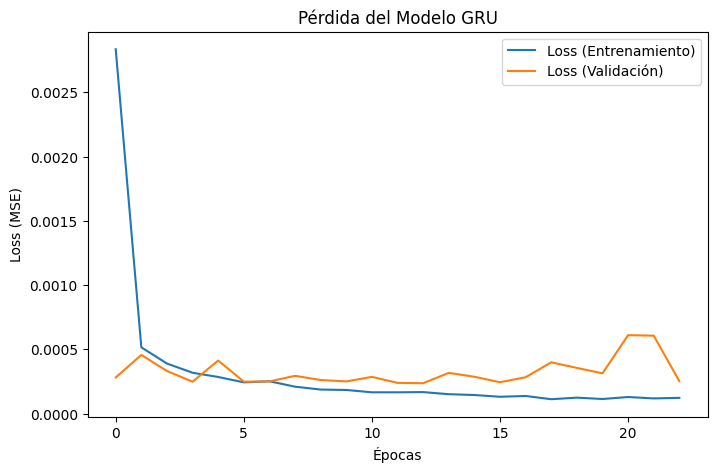

In [ ]:
plot_loss(history_gru, "GRU")

**Entrenamiento Transformer**

In [35]:
!pip install pandas ta numpy

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=5a262bb2655f7f2eafacb51eeab7abac7c513e3dac60824e8f6c3fd253655f7f
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [38]:
import pandas as pd
import numpy as np
import ta

# Relative Strength Index
df["RSI"] = ta.momentum.RSIIndicator(df["Último"], window=14).rsi()

# Moving Average Convergence Divergence
macd = ta.trend.MACD(df["Último"], window_slow=26, window_fast=12, window_sign=9)
df["MACD"] = macd.macd()
df["MACD_Signal"] = macd.macd_signal()
df["MACD_Diff"] = macd.macd_diff()

df.dropna(inplace=True)

print(df.head())


          Fecha   Último  Apertura   Máximo   Mínimo         Vol.        RSI  \
3707 2010-06-03  1895.66   1883.25  1898.93  1871.59  266220000.0  49.503339   
3706 2010-06-04  1832.04   1857.83  1879.31  1824.71  289330000.0  41.576244   
3705 2010-06-07  1798.16   1839.77  1845.30  1795.54  262880000.0  38.079194   
3704 2010-06-08  1795.70   1799.26  1805.84  1770.46  333140000.0  37.830381   
3703 2010-06-09  1778.92   1805.87  1823.21  1774.05  269330000.0  36.097745   

           MACD  MACD_Signal  MACD_Diff  
3707 -31.822140   -41.078902   9.256762  
3706 -32.097068   -39.282536   7.185467  
3705 -34.649367   -38.355902   3.706535  
3704 -36.450407   -37.974803   1.524396  
3703 -38.784663   -38.136775  -0.647888  


In [39]:
features = ["Apertura", "Máximo", "Mínimo", "Último", "Vol.", "RSI", "MACD", "MACD_Signal", "MACD_Diff"]

data = df[features].values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

seq_length = 512
X, y = [], []

for i in range(seq_length, len(data_scaled)):
    X.append(data_scaled[i-seq_length:i])
    y.append(data_scaled[i, 3])
X, y = np.array(X), np.array(y)

from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

print(f"X_train shape: {X_train.shape}, X_val shape: {X_val.shape}, X_test shape: {X_test.shape}")


X_train shape: (2237, 512, 9), X_val shape: (479, 512, 9), X_test shape: (480, 512, 9)


# **INFORMER**

In [ ]:
pip uninstall -y tensorflow keras tensorflow-text tf-keras


Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
Found existing installation: keras 3.8.0
Uninstalling keras-3.8.0:
  Successfully uninstalled keras-3.8.0
Found existing installation: tensorflow-text 2.18.1
Uninstalling tensorflow-text-2.18.1:
  Successfully uninstalled tensorflow-text-2.18.1
Found existing installation: tf_keras 2.18.0
Uninstalling tf_keras-2.18.0:
  Successfully uninstalled tf_keras-2.18.0


In [ ]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 99.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 107.0 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires tf-keras>=2.18.0, which is not installed.


In [27]:
pip install keras

In [63]:
import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention, Add, Lambda, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

seq_length = 512
num_features = 9
lambda_reg = 0.0001

@tf.keras.saving.register_keras_serializable()
class PositionalEmbedding(tf.keras.layers.Layer):
    def __init__(self, sequence_length, d_model, **kwargs):
        super().__init__(**kwargs)
        self.sequence_length = sequence_length
        self.d_model = d_model
        self.pos_emb = Embedding(input_dim=sequence_length, output_dim=d_model)

    def call(self, x):
        positions = tf.range(start=0, limit=tf.shape(x)[1], delta=1)
        positions = self.pos_emb(positions)
        return x + positions

    def get_config(self):
        config = super().get_config()
        config.update({
            "sequence_length": self.sequence_length,
            "d_model": self.d_model,
        })
        return config

class InformerHyperModel(kt.HyperModel):
    def build(self, hp):
        d_model = hp.Choice('d_model', [128, 256])
        num_heads = hp.Choice('num_heads', [2, 4, 6])
        ff_dim = hp.Choice('ff_dim', [256, 512, 1024])
        dropout_rate = hp.Choice('dropout_rate', [0.2, 0.3, 0.4])
        learning_rate = hp.Choice('learning_rate', [1e-4, 5e-4])

        inputs = Input(shape=(seq_length, num_features))

        x = Dense(d_model, kernel_regularizer=l2(lambda_reg))(inputs)
        x = PositionalEmbedding(seq_length, d_model)(x)

        attn = MultiHeadAttention(num_heads=num_heads, key_dim=d_model//num_heads)(x, x)
        attn = Dropout(dropout_rate)(attn)
        x = Add()([x, attn])
        x = LayerNormalization(epsilon=1e-6)(x)

        ffn = Dense(ff_dim, activation='relu')(x)
        ffn = Dropout(dropout_rate)(ffn)
        ffn = Dense(d_model)(ffn)
        x = Add()([x, ffn])
        x = LayerNormalization(epsilon=1e-6)(x)


        x = Lambda(lambda x: x[:, -1, :])(x)

        outputs = Dense(1)(x)

        model = Model(inputs, outputs)

        model.compile(
            optimizer=Adam(learning_rate=learning_rate),
            loss='mse',
            metrics=['mae']
        )
        return model

tuner = kt.RandomSearch(
    InformerHyperModel(),
    objective='val_loss',
    max_trials=15,
    executions_per_trial=1,
    directory='kt_informer_opt',
    project_name='nasdaq_informer_opt',
    overwrite=True
)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

tuner.search(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=128,
    callbacks=[early_stopping]
)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)

history = best_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=128,
    callbacks=[early_stopping]
)

y_pred = best_model.predict(X_test)
evaluar_modelo(y_test, y_pred)

Trial 15 Complete [00h 01m 07s]
val_loss: 0.004484045784920454

Best val_loss So Far: 0.0021494366228580475
Total elapsed time: 00h 37m 35s
Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 411ms/step - loss: 1.6818 - mae: 1.0669 - val_loss: 0.0215 - val_mae: 0.1177
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 146ms/step - loss: 0.1678 - mae: 0.3284 - val_loss: 0.1131 - val_mae: 0.3228
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step - loss: 0.0750 - mae: 0.2172 - val_loss: 0.0075 - val_mae: 0.0562
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - loss: 0.0410 - mae: 0.1597 - val_loss: 0.0113 - val_mae: 0.0837
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - loss: 0.0279 - mae: 0.1280 - val_loss: 0.0073 - val_mae: 0.0584
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - loss: 0.0197 - mae: 0.1074 - val_loss: 0.0043 - val_mae: 0.0404
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - loss: 0.0158 - mae: 0.0945 - val_loss: 0.0095 - val_mae: 0.0725
Epoch 8/100
18/18 ━━━━━━━

(0.005080886949417632, np.float64(0.07128034055346279), 0.058005072644818925)

In [64]:
best_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 512, 9)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 512, 256)       │          2,560 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ positional_embedding_1    │ (None, 512, 256)       │        131,072 │ dense_4[0][0]          │
│ (PositionalEmbedding)     │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_1    │ (None, 512, 256)       │        259,060 │ positional_embedding_… │
│ (MultiHeadAttention)      │                        │                │ positional_embedding_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 512, 256)       │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_2 (Add)               │ (None, 512, 256)       │              0 │ positional_embedding_… │
│                           │                        │                │ dropout_4[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_2     │ (None, 512, 256)       │            512 │ add_2[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 512, 256)       │         65,792 │ layer_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_5 (Dropout)       │ (None, 512, 256)       │              0 │ dense_5[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 512, 256)       │         65,792 │ dropout_5[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_3 (Add)               │ (None, 512, 256)       │              0 │ layer_normalization_2… │
│                           │                        │                │ dense_6[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_3     │ (None, 512, 256)       │            512 │ add_3[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_1 (Lambda)         │ (None, 256)            │              0 │ layer_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 1)              │            257 │ lambda_1[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,576,673 (6.01 MB)

 Trainable params: 525,557 (2.00 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,051,116 (4.01 MB)

In [65]:
best_model.save("modelo_informer_opt.keras")

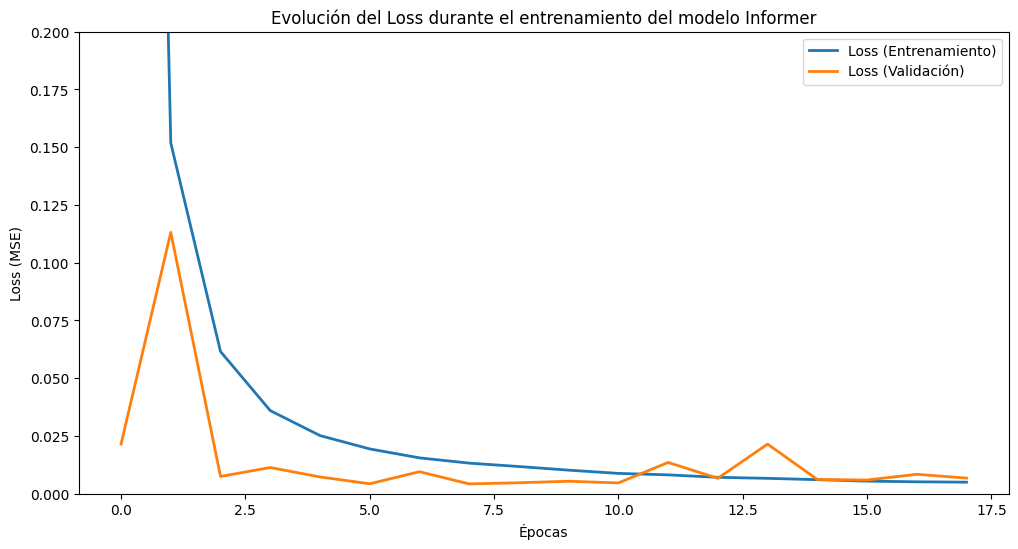

In [68]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='Loss (Entrenamiento)', linewidth=2)
plt.plot(history.history['val_loss'], label='Loss (Validación)', linewidth=2)
plt.title('Evolución del Loss durante el entrenamiento del modelo Informer')
plt.xlabel('Épocas')
plt.ylabel('Loss (MSE)')
plt.ylim(0, 0.2)
plt.legend()
plt.grid(False)
plt.show()

In [70]:
import numpy as np
import json

save_path = "./informer_guardado/"
os.makedirs(save_path, exist_ok=True)

# 📌 Guardar modelo
best_model.save(f'{save_path}best_informer_model.keras')

# 📌 Guardar historial
with open(f'{save_path}history_informer.json', 'w') as f:
    json.dump(history.history, f)

# 📌 Guardar hiperparámetros óptimos
best_hps_dict = {
    "num_heads": best_hps.get('num_heads'),
    "ff_dim": best_hps.get('ff_dim'),
    "dropout_rate": best_hps.get('dropout_rate'),
    "learning_rate": best_hps.get('learning_rate')
}
with open(f'{save_path}best_hyperparameters.json', 'w') as f:
    json.dump(best_hps_dict, f)

# 📌 Guardar predicciones
np.save(f'{save_path}y_pred.npy', y_pred)

print("✅")


✅


Transformer - XL

In [53]:
import tensorflow as tf
import keras_tuner as kt
import numpy as np
import json
import time
import os

from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Dense, Dropout, LayerNormalization,
    MultiHeadAttention, Add, Lambda, Embedding
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

seq_length = 512
num_features = 9
lambda_reg = 0.0001

class PositionalEmbedding(tf.keras.layers.Layer):
    def __init__(self, sequence_length, d_model):
        super().__init__()
        self.pos_emb = Embedding(input_dim=sequence_length, output_dim=d_model)

    def call(self, x):
        positions = tf.range(start=0, limit=tf.shape(x)[1], delta=1)
        positions = self.pos_emb(positions)
        return x + positions

class TransformerXL_HyperModel(kt.HyperModel):
    def build(self, hp):
        d_model = hp.Choice('d_model', [128, 256])
        num_heads = hp.Choice('num_heads', [2, 4, 6])
        ff_dim = hp.Choice('ff_dim', [256, 512, 1024])
        dropout_rate = hp.Choice('dropout_rate', [0.2, 0.3, 0.4])
        learning_rate = hp.Choice('learning_rate', [0.0001, 0.0005])

        inputs = Input(shape=(seq_length, num_features))
        x = Dense(d_model, kernel_regularizer=l2(lambda_reg))(inputs)
        x = PositionalEmbedding(seq_length, d_model)(x)

        attn = MultiHeadAttention(num_heads=num_heads, key_dim=d_model // num_heads)(x, x)
        attn = Dropout(dropout_rate)(attn)
        x = Add()([x, attn])
        x = LayerNormalization(epsilon=1e-6)(x)

        ffn = Dense(ff_dim, activation="relu")(x)
        ffn = Dropout(dropout_rate)(ffn)
        ffn = Dense(d_model)(ffn)
        x = Add()([x, ffn])
        x = LayerNormalization(epsilon=1e-6)(x)

        x = Lambda(lambda x: x[:, -1, :])(x)
        outputs = Dense(1)(x)

        model = Model(inputs, outputs)
        model.compile(optimizer=Adam(learning_rate=learning_rate), loss="mse", metrics=["mae"])
        return model

tuner = kt.RandomSearch(
    TransformerXL_HyperModel(),
    objective="val_loss",
    max_trials=15,
    executions_per_trial=1,
    directory="kt_transformer_xl",
    project_name="nasdaq_close_prediction",
    overwrite=True
)

early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

tuner.search(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=128,
    callbacks=[early_stopping]
)

best_hps = tuner.get_best_hyperparameters(1)[0]
best_model = tuner.hypermodel.build(best_hps)

history = best_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=128,
    callbacks=[early_stopping]
)

y_pred = best_model.predict(X_test)
evaluar_modelo(y_test, y_pred)

Trial 15 Complete [00h 00m 42s]
val_loss: 0.029284251853823662

Best val_loss So Far: 0.0029895957559347153
Total elapsed time: 00h 31m 11s
Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 354ms/step - loss: 0.5482 - mae: 0.5949 - val_loss: 0.1091 - val_mae: 0.2607
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - loss: 0.2727 - mae: 0.4110 - val_loss: 0.0458 - val_mae: 0.1729
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 0.2031 - mae: 0.3611 - val_loss: 0.0199 - val_mae: 0.1151
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 0.1402 - mae: 0.2950 - val_loss: 0.0116 - val_mae: 0.0819
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.1174 - mae: 0.2697 - val_loss: 0.0085 - val_mae: 0.0682
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0890 - mae: 0.2352 - val_loss: 0.0142 - val_mae: 0.0917
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 0.0710 - mae: 0.2108 - val_loss: 0.0076 - val_mae: 0.0624
Epoch 8/100
18/18 ━━━━━━━━━━━━━━

(0.01189554877776168, np.float64(0.10906671709445408), 0.09001168292807868)

In [55]:
best_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 512, 9)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 512, 128)       │          1,280 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ positional_embedding_1    │ (None, 512, 128)       │         65,536 │ dense_4[0][0]          │
│ (PositionalEmbedding)     │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_1    │ (None, 512, 128)       │         66,048 │ positional_embedding_… │
│ (MultiHeadAttention)      │                        │                │ positional_embedding_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 512, 128)       │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_2 (Add)               │ (None, 512, 128)       │              0 │ positional_embedding_… │
│                           │                        │                │ dropout_4[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_2     │ (None, 512, 128)       │            256 │ add_2[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 512, 512)       │         66,048 │ layer_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_5 (Dropout)       │ (None, 512, 512)       │              0 │ dense_5[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 512, 128)       │         65,664 │ dropout_5[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_3 (Add)               │ (None, 512, 128)       │              0 │ layer_normalization_2… │
│                           │                        │                │ dense_6[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_3     │ (None, 512, 128)       │            256 │ add_3[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_1 (Lambda)         │ (None, 128)            │              0 │ layer_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 1)              │            129 │ lambda_1[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 795,653 (3.04 MB)

 Trainable params: 265,217 (1.01 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 530,436 (2.02 MB)

In [56]:
import json
import numpy as np

save_path = "./"

best_model.save(f'{save_path}best_transformer_xl.keras')

history_dict = history.history
with open(f'{save_path}history_transformer_xl.json', 'w') as f:
    json.dump(history_dict, f)

best_hps_dict = {
    "num_heads": best_hps.get("num_heads"),
    "ff_dim": best_hps.get("ff_dim"),
    "dropout_rate": best_hps.get("dropout_rate"),
    "learning_rate": best_hps.get("learning_rate")
}
with open(f'{save_path}best_hyperparameters_transformer_xl.json', 'w') as f:
    json.dump(best_hps_dict, f)

np.save(f'{save_path}y_pred_transformer_xl.npy', y_pred)

print("✅")

✅


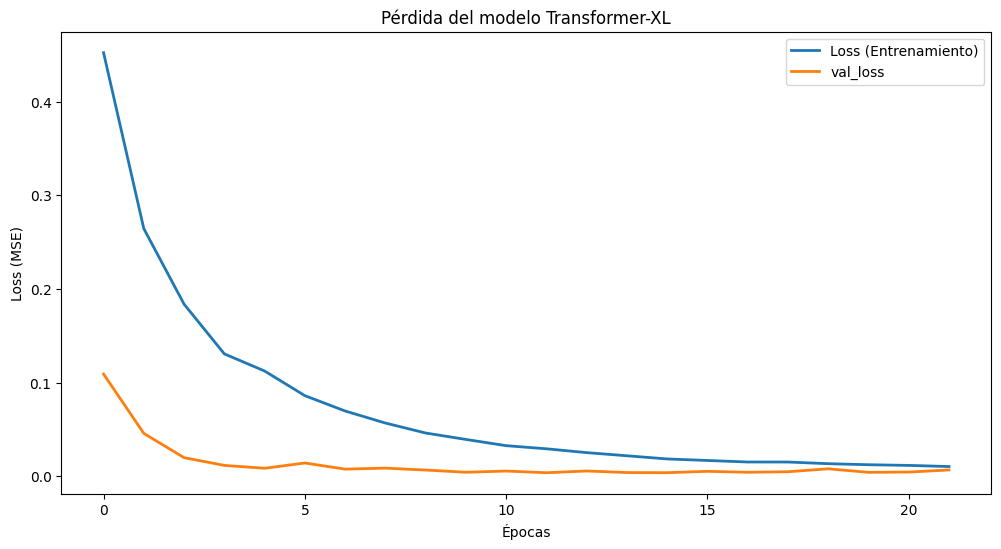

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='Loss (Entrenamiento)', linewidth=2)
plt.plot(history.history['val_loss'], label='val_loss', linewidth=2)
plt.title('Pérdida del modelo Transformer-XL')
plt.xlabel('Épocas')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()



FEDformer

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, Add, Lambda, Permute
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import keras_tuner as kt
import tensorflow.signal as tf_signal

seq_length = 512
num_features = 9
lambda_reg = 0.0001

class FEDformer_HyperModel(kt.HyperModel):
    def build(self, hp):
        dropout_rate = hp.Choice('dropout_rate', [0.2, 0.3, 0.4])
        ff_dim = hp.Choice('ff_dim', [256, 512, 1024])
        learning_rate = hp.Choice('learning_rate', [0.0001, 0.0005])
        hidden_dim = hp.Choice('hidden_dim', [64, 128, 256])

        inputs = Input(shape=(seq_length, num_features))

        def fourier_block(x):
            x_freq = tf_signal.rfft(x)
            x_time = tf_signal.irfft(x_freq, fft_length=[tf.shape(x)[1]])
        x = Lambda(fourier_block, output_shape=(seq_length, num_features))(inputs)

        x = Permute((2, 1))(x)

        x = Dense(hidden_dim, activation='relu', kernel_regularizer=l2(lambda_reg))(x)
        x = Dropout(dropout_rate)(x)

        x = Dense(ff_dim, activation="relu")(x)
        x = Dense(hidden_dim)(x)
        x = Dropout(dropout_rate)(x)
        x = LayerNormalization(epsilon=1e-6)(x)

        x = Lambda(lambda x: x[:, -1, :])(x)

        outputs = Dense(1)(x)

        model = Model(inputs, outputs)
        model.compile(optimizer=Adam(learning_rate=learning_rate), loss="mse")
        return model



In [21]:
tuner = kt.RandomSearch(
    FEDformer_HyperModel(),
    objective="val_loss",
    max_trials=15,
    executions_per_trial=1,
    directory="kt_fedformer",
    project_name="fedformer_rsi_macd",
    overwrite=True
)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

tuner.search(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=128,
    callbacks=[early_stopping]
)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)

history = best_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=128,
    callbacks=[early_stopping]
)

y_pred = best_model.predict(X_test)
evaluar_modelo(y_test, y_pred)

Trial 15 Complete [00h 00m 39s]
val_loss: 0.030348990112543106

Best val_loss So Far: 0.013128956779837608
Total elapsed time: 00h 13m 02s
Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 206ms/step - loss: 0.9565 - val_loss: 0.0734
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3408 - val_loss: 0.0910
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2105 - val_loss: 0.0555
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1630 - val_loss: 0.0477
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1273 - val_loss: 0.0285
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1010 - val_loss: 0.0376
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0914 - val_loss: 0.0311
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0768 - val_loss: 0.0239
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0671 - val_loss: 0.0248
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0606 - val_loss: 0.0288

(0.012917661904083092, np.float64(0.11365589251808765), 0.09151431735452557)

In [23]:
best_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 512, 9)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda_2 (Lambda)                    │ (None, 512, 9)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ permute_1 (Permute)                  │ (None, 9, 512)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 9, 128)              │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 9, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 9, 256)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 9, 128)              │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 9, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_1                │ (None, 9, 128)              │             256 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda_3 (Lambda)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 395,909 (1.51 MB)

 Trainable params: 131,969 (515.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 263,940 (1.01 MB)

In [24]:
import json

best_model.save("fedformer_best.h5")

with open("fedformer_history.json", "w") as f:
    json.dump(history.history, f)

best_hps_dict = best_hps.values
with open("fedformer_best_hps.json", "w") as f:
    json.dump(best_hps_dict, f)

print("✅")


✅


In [25]:
import tensorflow as tf
from tensorflow.keras.layers import Layer
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.saving import register_keras_serializable
import json

@register_keras_serializable(package="Custom", name="FourierBlock")
class FourierBlock(Layer):
    def call(self, inputs):
        return tf.math.real(tf.signal.irfft(tf.signal.rfft(inputs), fft_length=[tf.shape(inputs)[1]]))


In [26]:
best_model.save("fedformer_best.h5")

In [32]:
import tensorflow as tf
import tensorflow.signal as tf_signal

def fourier_block(x):
    x_freq = tf_signal.rfft(x)
    x_time = tf_signal.irfft(x_freq, fft_length=[tf.shape(x)[1]])
    return tf.math.real(x_time)

In [35]:
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError

model = load_model("fedformer_best.h5", custom_objects={
    "fourier_block": fourier_block,
    "mse": MeanSquaredError()
})

In [37]:
import json

with open("fedformer_history.json", "w") as f:
    json.dump(history.history, f)

best_hps_dict = best_hps.values
with open("fedformer_best_hps.json", "w") as f:
    json.dump(best_hps_dict, f)

In [38]:
with open("fedformer_history.json", "r") as f:
    history_dict = json.load(f)

with open("fedformer_best_hps.json", "r") as f:
    best_hps_dict = json.load(f)


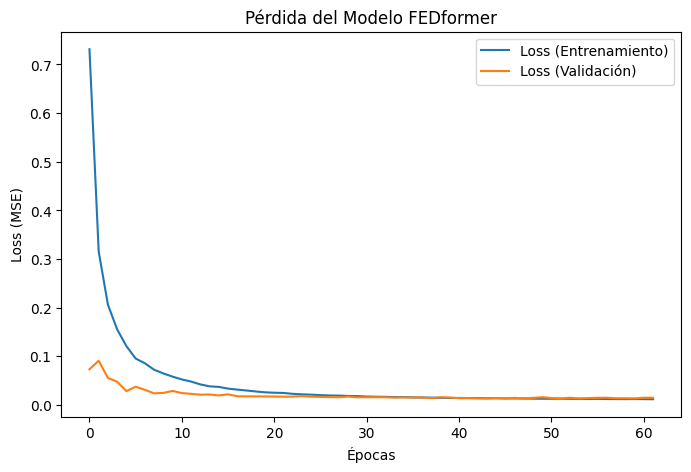

In [40]:
plot_loss(history_dict, "FEDformer")

HYBRID INFORMER-LSTM

In [40]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention, Add, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import keras_tuner as kt

seq_length = 512
num_features = 9
lambda_reg = 0.0001

class InformerLSTMHyperModel(kt.HyperModel):
    def build(self, hp):
        num_heads = hp.Choice('num_heads', [2, 4, 6])
        ff_dim = hp.Choice('ff_dim', [256, 512, 1024])
        dropout_rate = hp.Choice('dropout_rate', [0.2, 0.3, 0.4])

        inputs = Input(shape=(seq_length, num_features))

        x = Dense(256, kernel_regularizer=l2(lambda_reg))(inputs)

        attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=256 // num_heads)(x, x)
        attn_output = Dropout(dropout_rate)(attn_output)
        attn_output = Add()([x, attn_output])
        attn_output = LayerNormalization(epsilon=1e-6)(attn_output)

        lstm_out = LSTM(256, return_sequences=True, dropout=dropout_rate)(attn_output)
        lstm_out = LSTM(128, return_sequences=False, dropout=dropout_rate)(lstm_out)

        ff = Dense(ff_dim, activation="relu")(lstm_out)
        ff = Dense(256)(ff)
        ff = Dropout(dropout_rate)(ff)
        ff = LayerNormalization(epsilon=1e-6)(ff)

        outputs = Dense(1)(ff)
        model = Model(inputs, outputs)

        learning_rate = hp.Choice("learning_rate", [0.0001, 0.0005])
        optimizer = Adam(learning_rate=learning_rate)
        model.compile(optimizer=optimizer, loss="mse")

        return model

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

tuner = kt.RandomSearch(
    InformerLSTMHyperModel(),
    objective="val_loss",
    max_trials=15,
    executions_per_trial=1,
    directory="kt_informer",
    project_name="informer_rsi_macd",
    overwrite=True
)

early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

tuner.search(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=128,
    callbacks=[early_stopping]
)

best_hps = tuner.get_best_hyperparameters(1)[0]
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=128,
    callbacks=[early_stopping]
)

y_pred = best_model.predict(X_test)
evaluar_modelo(y_test, y_pred)

Trial 15 Complete [00h 01m 47s]
val_loss: 0.019894754514098167

Best val_loss So Far: 0.007760137319564819
Total elapsed time: 01h 05m 16s
Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 329ms/step - loss: 5.5874 - val_loss: 0.1977
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 285ms/step - loss: 0.3548 - val_loss: 0.2498
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 288ms/step - loss: 0.2341 - val_loss: 0.0534
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 291ms/step - loss: 0.1772 - val_loss: 0.0258
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 301ms/step - loss: 0.1413 - val_loss: 0.0339
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 287ms/step - loss: 0.1258 - val_loss: 0.0158
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 288ms/step - loss: 0.0941 - val_loss: 0.0239
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 302ms/step - loss: 0.0838 - val_loss: 0.0271
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 301ms/step - loss: 0.0641 - val_loss: 0.0172
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 290ms/step - loss: 0.0513 - va

(0.04039864422850956, np.float64(0.20099413978648623), 0.17015261389439834)

In [47]:
best_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 512, 9)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 512, 256)       │          2,560 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_1    │ (None, 512, 256)       │        263,168 │ dense_4[0][0],         │
│ (MultiHeadAttention)      │                        │                │ dense_4[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 512, 256)       │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 512, 256)       │              0 │ dense_4[0][0],         │
│                           │                        │                │ dropout_4[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_2     │ (None, 512, 256)       │            512 │ add_1[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_2 (LSTM)             │ (None, 512, 256)       │        525,312 │ layer_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_3 (LSTM)             │ (None, 128)            │        197,120 │ lstm_2[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 512)            │         66,048 │ lstm_3[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 256)            │        131,328 │ dense_5[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_5 (Dropout)       │ (None, 256)            │              0 │ dense_6[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_3     │ (None, 256)            │            512 │ dropout_5[0][0]        │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 1)              │            257 │ layer_normalization_3… │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 3,560,453 (13.58 MB)

 Trainable params: 1,186,817 (4.53 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,373,636 (9.05 MB)

In [43]:
import json
import numpy as np
import time

timestamp = time.strftime("%Y%m%d_%H%M%S")
save_path = "./"

best_model.save(f"{save_path}best_informer_lstm_{timestamp}.keras")

with open(f"{save_path}history_informer_lstm_{timestamp}.json", "w") as f:
    json.dump(history.history, f)

best_hps_dict = {
    "num_heads": best_hps.get("num_heads"),
    "ff_dim": best_hps.get("ff_dim"),
    "dropout_rate": best_hps.get("dropout_rate"),
    "learning_rate": best_hps.get("learning_rate")
}
with open(f"{save_path}best_hyperparameters_informer_lstm_{timestamp}.json", "w") as f:
    json.dump(best_hps_dict, f)

np.save(f"{save_path}y_pred_informer_lstm_{timestamp}.npy", y_pred)

print(f"✅")

✅


In [44]:
import os
import json
import numpy as np
from tensorflow.keras.models import load_model

save_path = "./"

def get_latest_file(prefix, extension):
    files = [f for f in os.listdir(save_path) if f.startswith(prefix) and f.endswith(extension)]
    if not files:
        raise FileNotFoundError(f"No se encontró ningún archivo que empiece con {prefix}")
    files.sort(reverse=True)
    return os.path.join(save_path, files[0])

model_path = get_latest_file("best_informer_lstm_", ".keras")
model = load_model(model_path)
print(f"✅ Modelo cargado: {model_path}")

history_path = get_latest_file("history_informer_lstm_", ".json")
with open(history_path, "r") as f:
    history = json.load(f)
print(f"✅ History cargado: {history_path}")

hps_path = get_latest_file("best_hyperparameters_informer_lstm_", ".json")
with open(hps_path, "r") as f:
    best_hps = json.load(f)
print(f"✅ Hiperparámetros cargados: {hps_path}")

y_pred_path = get_latest_file("y_pred_informer_lstm_", ".npy")
y_pred = np.load(y_pred_path)
print(f"✅ Predicciones cargadas: {y_pred_path}")

✅ Modelo cargado: ./best_informer_lstm_20250323_194228.keras
✅ History cargado: ./history_informer_lstm_20250323_194228.json
✅ Hiperparámetros cargados: ./best_hyperparameters_informer_lstm_20250323_194228.json
✅ Predicciones cargadas: ./y_pred_informer_lstm_20250323_194228.npy


In [50]:
import json

with open("history_informer_lstm_20250322_103713.json", "r") as f:
    history_informer_lstm = json.load(f)


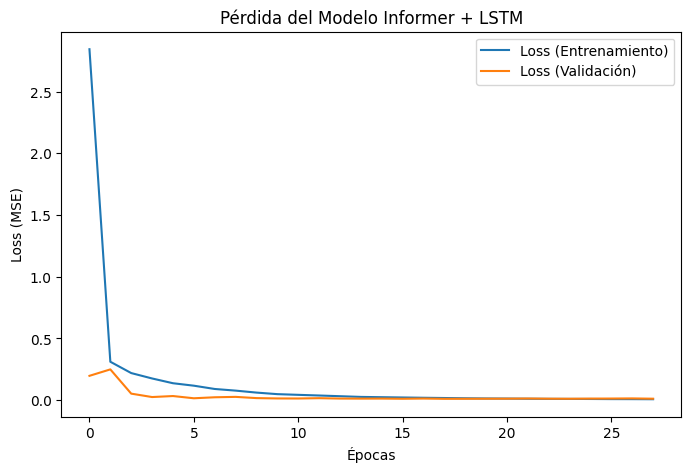

In [46]:
plot_loss(history, model_name="Informer + LSTM")

HYBRID TRANSFORMER-LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention, Add, LSTM, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import keras_tuner as kt

seq_length = 512
num_features = 9
lambda_reg = 0.0001

class HybridTransformerLSTM(kt.HyperModel):
    def build(self, hp):
        num_heads = hp.Choice('num_heads', [2, 4, 6])
        ff_dim = hp.Choice('ff_dim', [256, 512, 1024])
        dropout_rate = hp.Choice('dropout_rate', [0.2, 0.3, 0.4])

        inputs = Input(shape=(seq_length, num_features))
        x = Dense(256, kernel_regularizer=l2(lambda_reg))(inputs)

        attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=256 // num_heads)(x, x)
        attn_output = Dropout(dropout_rate)(attn_output)
        attn_output = Add()([x, attn_output])
        attn_output = LayerNormalization(epsilon=1e-6)(attn_output)

        lstm_output = LSTM(256, return_sequences=True, dropout=dropout_rate)(attn_output)
        lstm_output = LSTM(128, return_sequences=False, dropout=dropout_rate)(lstm_output)

        ffn_output = Dense(ff_dim, activation="relu")(lstm_output)
        ffn_output = Dense(256)(ffn_output)
        ffn_output = Dropout(dropout_rate)(ffn_output)
        x = LayerNormalization(epsilon=1e-6)(ffn_output)

        outputs = Dense(1)(x)
        model = Model(inputs, outputs)

        learning_rate = hp.Choice('learning_rate', [0.0001, 0.0005])
        optimizer = Adam(learning_rate=learning_rate)

        model.compile(optimizer=optimizer, loss="mse")
        return model


In [ ]:
tuner = kt.RandomSearch(
    HybridTransformerLSTM(),
    objective="val_loss",
    max_trials=15,
    executions_per_trial=1,
    directory="kt_hybrid",
    project_name="hybrid_transformer_lstm",
    overwrite=True
)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

tuner.search(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=128,
    callbacks=[early_stopping]
)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)

history = best_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=128,
    callbacks=[early_stopping]
)

y_pred = best_model.predict(X_test)
evaluar_modelo(y_test, y_pred)


Trial 15 Complete [00h 06m 03s]
val_loss: 0.009414401836693287

Best val_loss So Far: 0.007286555133759975
Total elapsed time: 01h 10m 36s
Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 296ms/step - loss: 4.5925 - val_loss: 0.1505
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 276ms/step - loss: 0.4624 - val_loss: 0.2490
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 279ms/step - loss: 0.2785 - val_loss: 0.0795
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 280ms/step - loss: 0.2243 - val_loss: 0.0537
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 269ms/step - loss: 0.1820 - val_loss: 0.0302
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 286ms/step - loss: 0.1374 - val_loss: 0.0257
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 264ms/step - loss: 0.1000 - val_loss: 0.0369
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 264ms/step - loss: 0.0779 - val_loss: 0.0201
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 265ms/step - loss: 0.0642 - val_loss: 0.0154
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 267ms/step - loss: 0.0502 - val_

(0.03758388464342375, np.float64(0.19386563554024666), 0.1627317576130957)

In [ ]:
import json

best_model.save("hybrid_transformer_lstm_best.h5")

with open("hybrid_transformer_lstm_history.json", "w") as f:
    json.dump(history.history, f)

best_hps_dict = best_hps.values
with open("hybrid_transformer_lstm_best_hps.json", "w") as f:
    json.dump(best_hps_dict, f)

print("✅")

✅


In [ ]:
import os
import json

os.makedirs("resultados/hybrid_transformer_lstm", exist_ok=True)

with open("resultados/hybrid_transformer_lstm/history.json", "w") as f:
    json.dump(history.history, f)

best_hps_dict = best_hps.values
with open("resultados/hybrid_transformer_lstm/best_hps.json", "w") as f:
    json.dump(best_hps_dict, f)

print("✅")

✅


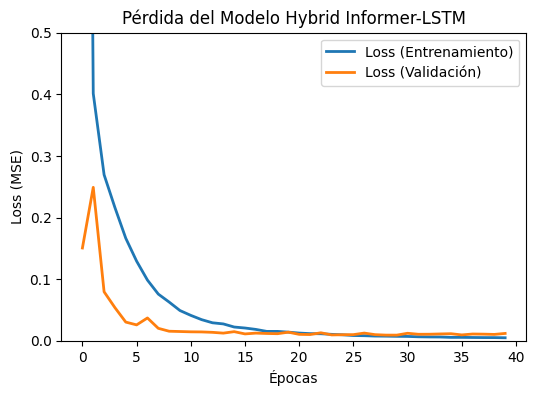

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(hybrid_history["loss"], label="Loss (Entrenamiento)", linewidth=2)
plt.plot(hybrid_history["val_loss"], label="Loss (Validación)", linewidth=2)
plt.title("Pérdida del Modelo Hybrid Informer-LSTM", fontsize=12)
plt.xlabel("Épocas", fontsize=10)
plt.ylabel("Loss (MSE)", fontsize=10)
plt.legend(fontsize=10)

plt.ylim(0, 0.5)

plt.show()


COMPARACIÓN

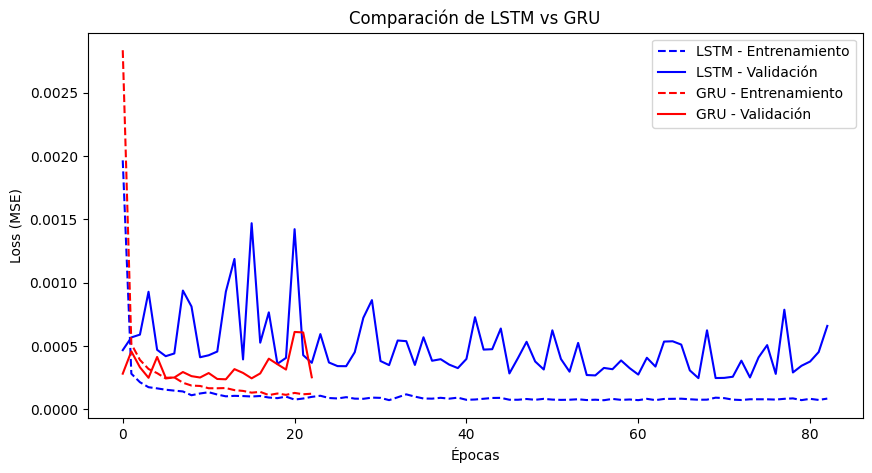

In [ ]:
import matplotlib.pyplot as plt

def comparar_modelos(history_lstm, history_gru):
    plt.figure(figsize=(10, 5))

    plt.plot(history_lstm['loss'], label='LSTM - Entrenamiento', linestyle='dashed', color='blue')
    plt.plot(history_lstm['val_loss'], label='LSTM - Validación', linestyle='solid', color='blue')

    plt.plot(history_gru['loss'], label='GRU - Entrenamiento', linestyle='dashed', color='red')
    plt.plot(history_gru['val_loss'], label='GRU - Validación', linestyle='solid', color='red')

    plt.xlabel("Épocas")
    plt.ylabel("Loss (MSE)")
    plt.title("Comparación de LSTM vs GRU")
    plt.legend()
    plt.show()

comparar_modelos(history_lstm, history_gru)

